#Iteration and Recursion 3: Finding a 3-Point Interval
Sorry, basketball fans&mdash;it's not related!

In [1]:
# Let these packages load while you read
using Images
using Interact
using Reactive
using Revealables
include("files/answers.jl");

##The Premise
If your goal is to optimize (maximize or minimize) the value of an equation, one of the very first steps is to find an interval where that value might occur.

For example, when using the Secant Method, even before the first iterative step, we found two points that were close to the desired root. In order to do this, we first had to obtain a graph or table of values so we could get a ballpark estimate of where the root might be.

Similarly, when you’re trying to find a maximum or minimum value of a function, you need a ballpark estimate of where the optimal point might be before you can begin the iterative process. This interval becomes the starting location for whatever procedure you use to find the maximum or minimum.

Interact.ToggleButton(1: "input" = false Bool , "The starting point is obvious if you know the graph, but what if you don't?", false)

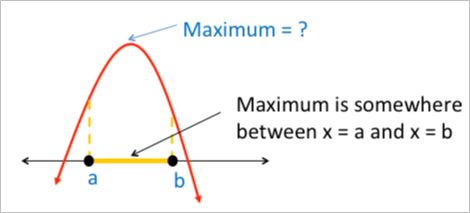

  likely near C:\Users\Victoria Docherty\.julia\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Users\Victoria Docherty\.julia\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Users\Victoria Docherty\.julia\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Users\Victoria Docherty\.julia\v0.6\IJulia\src\kernel.jl:31


In [2]:
img1 = Images.load("files/1-5/findmax.png")
img2 = Images.load("files/1-5/findmax2.png")
@manipulate for y in togglebutton(; label="The starting point is obvious if you know the graph, but what if you don't?", value=false, signal=Signal(false))
    if y
        restrict(img2)
    else
        restrict(img1)
    end
end

A graphing calculator might be helpful if your graph is one-dimensional (independent variable = $x$, response = $y$). But graphing calculators don't work so well when you have two or three or five or twenty independent variables, which happens. We’re going to stick with one independent variable for educational purposes, but the basic idea is the same (and often, this exact procedure is a step) in high-dimension optimization.

Also, when we transfer over to computers... well, let’s just say "look at the graph" is not a command that computers understand. Humans have the advantage of eyes, computers have the advantage of being able to operate on ugly decimals with astonishing speed. It's a trade-off. Here, we're learning how to convince a computer to find an optimal point, without eyes.

## Step 1: Pick a point

The first thing you do is find a point. Any point. Since you have no clues about the graph or its shape, you're flying blind. Pick your favorite number (π? Actually, let's pick 2) and plug it in.

In [3]:
f(x) = sin(x)^3/x^2 # This is our mystery function. Don't graph it!

f (generic function with 1 method)

In [4]:
typeof("9.0")

String

In [5]:
x1 = 2 # Our first x-coordinate is 2...

2

In [6]:
f(x1) # And we can calculate the y-coordinate

0.1879567361672482

Notice that we still have no information about the shape of the graph.

##Step 2: Pick an interval value

Next, you find a second point pretty close to the first. You can do this by guessing a second number, but you can save steps later by just picking an interval value, which I’ll call $h$. your second point will have an x-coordinate $h$ units larger than the first.

In [7]:
# x1 is still 2, and f(x1) is still... whatever you calculated it to be.

h = 0.5

0.5

In [8]:
x2 = x1 + h

2.5

In [9]:
f(x2) # The next y-coordinate

0.03429665822148522

<img src="files/1-5/interval_right.png" width=250 align="right" />Since we chose $x_1 = 2$ and $h = 0.5$, we have points at $(2,~f(2))$ and $(2.5,~f(2.5))$.

##Step 3: The initial test

Once you have the second point, you compare it to the first.

* If you're seeking a _minimum_, you want your second point to be lower (smaller $y$) than the first.
* If you're seeking a _maximum_, you want your second point to be higher (larger $y$).

Let's say we want to find a maximum.

In [10]:
f(x1) < f(x2) # Is the second point higher than the first?

false

If the second point fails the test, change your $h$ to $–h$ and try again with $(x,~ f(x))$ and $(x-h,~ f(x-h))$.<img src="files/1-5/interval_left.png" width=350 align="right" />

If the graph is decreasing to the right, it’s usually increasing to the left, and vice-versa.

In [11]:
# x1 is (still) 2, f(x1) is still 0.1879567...

x3 = x1 - h # Now we're checking an x-coordinate on the other side of x1

1.5

In [12]:
f(x3) # For a maximum, we would like this to be bigger than f(x1)

0.44111278638636225

###Practice Problem A
For the given function $f(x)$, starting point $x$, and interval $h$, find the three points $(x,~f(x))$, $(x+h,~f(x+h))$, and $(x-h,~f(x-h))$. 

What is the direction of increase (left or right)? What is the direction of decrease? 

1. $f(x) = x^2 + 3,~x = 4,~h = 0.1$
    
2. $f(x) = 2x^3 – 4x^2 + 17,~x = 2,~h = 1$
    
3. $f(x) = e^x – 4x + 2,~x = 0,~h = 0.5$


In [13]:
# Use this code cell as a calculator!





In [14]:
revealable(ans105A)

Interact.ToggleButton(4: "input-2" = false Bool , "Answer", false)

  likely near C:\Users\Victoria Docherty\.julia\v0.6\IJulia\src\kernel.jl:31
  likely near C:\Users\Victoria Docherty\.julia\v0.6\IJulia\src\kernel.jl:31


##Step 4: After the initial test

Once you know your direction, take another step in that direction using the same value of $h$.

If you were _minimizing_ a _decreasing function_ it might look like this:

<img src="files/1-5/min2ints.png" width=350 align="center" />

Now you have 3 points.

##The Goal

If you're looking for a _minimum_, your ultimate goal is to find an interval of three points such that the point in the middle is lower than both endpoints:

<img src="files/1-5/mingoal.png" width=350 align="center" />

When you get this type of picture, you know there is a minimum somewhere in the interval between $x_k$ and $x_{k+2}$. 

For a maximum, it would be the reverse: three points such that the middle point is higher than both endpoints. 

##The Loop

1. Start with $(x,~f(x))$.
2. Find $(x+h,~f(x+h))$ and check if it's going the right direction. If not, find $(x-h,~f(x-h))$.
3. Take one more step in the $h$ or $–h$ direction.
4. Check if you have reached the goal (middle point higher/lower than both endpoints). 
    - If yes, stop.
    - If no, return to step 3.

The endpoints will be the most recent point and the 3rd-most-recent point. The middle point will be the 2nd-most-recent point. 

Is this process iterative or recursive? Both! The steps of the loop are iterative. However, the loop is also recursive because as we walk from interval to interval with this procedure, each new point starts life as an endpoint, then drifts to middle point, then becomes the other endpoint, then out of consideration. The output of each iteration (a new point) becomes part of the input to the next test.


###Practice Problem B

For the given function f(x), starting point x, and interval h, use the steps to find a 3-point interval without referencing a graph:

1. $f(x) = x^2 – 4x,~x = 0,~h = 0.6$, interval contains the minimum
    
2. $f(x) = x^3 – 5x^2 + 3x + 2,~x = 2,~h = 0.5$, interval contains the maximum

These problems worked nicely without having to change $h$ too much. That won't always be true, so enjoy it while it lasts!

In [15]:
# Do your calculations here






In [16]:
revealable(ans105B)

Interact.ToggleButton(7: "input-3" = false Bool , "Answer", false)

##The problem with $h$

In the practice problems, $h$ was chosen for you on purpose, because determining $h$ brings up a pervasive issue:
- If $h$ is too big, your margin of error is large and you risk skipping over the maximum or minimum completely.
- If $h$ is too small, the calculations become too numerous. You don’t want it to require a thousand calculations each time it cycles through.


##The Loop, <font color="red">Modified</font>

1. Start with $(x,~f(x))$.
2. Find $(x+h,~f(x+h))$ and check if it's going the right direction. If not, find $(x-h,~f(x-h))$.
3. Take one more step in the $h$ or $–h$ direction.
4. Check if you have reached the goal (middle point higher/lower than both endpoints). 
    - If yes, stop.
        - If no, <font color="red">increase $h$ and</font> return to step 3.

##Solving the problem with $h$

One solution is to start with small values of $h$ (like 0.1) and then increase $h$ as the loop continues to iterate.

Doubling $h$ is troublesome because it gets too big too fast: $h,~ 2h,~ 4h,~ 8h,~ 16h,~ 32h,~ 64h,~ 128h...$

Multiplying $h$ by 1.5 makes ugly decimals that eventually lead to rounding errors: $h,~ 1.5h,~ 2.25h,~ 3.375h,~ 5.0625h,~ 7.59375h...$

So a good compromise is to use Fibonacci numbers: $h,~ h,~ 2h,~ 3h,~ 5h,~ 8h,~ 13h,~ 21h...$



##Problems with the procedure
<img src="files/1-5/problems.png" width=250 align="left" />
__This procedure will only find a _local_ minimum or maximum, not necessarily the _absolute_ minimum or maximum.__ There is no easy way to prevent this error, but some advanced methods have been developed to do so.

__If the function is unbounded, you might not find an interval at all.__ You can either introduce a boundary (like $x$ must be between \_\_\_ and \_\_\_ ), or you can stop the process if you appear to be heading off toward infinity, and start again with a different $x$.


###Practice Problem C

Choose an $x$ and $h$ and use the iterative procedure to find a 3-point interval. Go step by step!
1. $f(x) = x^3 – 10x^2 – 400x + 4000$, interval contains a maximum.

2. $f(x) = e^x – 2xsin(x) – 20x$, interval contains a minimum.

You may graph to _check_ your work, but not to start it.


In [17]:
# Do work here




In [19]:
revealable(ans105C)

Interact.ToggleButton(13: "input-5" = false Bool , "Answer", false)